# Explore Exercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import acquire as a
import prepare as p


# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)


### **Store EDA**

##### *choose a method of aggregating such that each observation is a unique date.*
##### *choose a method of splitting your data and only explore the training split.*



In [2]:
df = a.wrangle_store_data()

In [3]:
df = p.prepare_store_data(df)

In [4]:
df.head()

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX
2013-01-01,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX


In [5]:
df.size, df.shape

(10956000, (913000, 12))

In [6]:
df.tail(2)

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,
2017-12-31,28,719175900007,719175900007,Usda Produce,Guava,7.52,505802,59,12018 Perrin Beitel Rd,78217,San Antonio,TX
2017-12-31,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,913000,82,8503 NW Military Hwy,78231,San Antonio,TX


In [7]:
# dates appear to be from 01012013 to 12312017 for a total of five years.

In [8]:
df = df.sort_index()

#### Train-Test Split

In [9]:
# It seems for business analysis, the seasonality should be aligned
# with business year or tax year. In this case, I will use a standard
# calendar year for lack of further information.

##### *Initial Notes* 
1. The general form of a row of data seems to be as follows:
    1. the total quantity of a given item sold ('sale_amount') and 
    1. the item price (item_price) which seems to be for a single unit
    1. there is also a store address broken out over four fields
    1. there is an item_id that I can't decipher
    
1. Questions to explore:
    1. what is the item_id? product id given by store. total of 50 products
    1. how many unique stores are there? there are 10 stores.
    1. how many uniques dates are there? there are 1826 dates
    1. can zip code be used as a proxy for each store? Yes.
    
1. Features to add:
    1. a sale_total, that = item_price * sale_amount
    


In [10]:
# add sale_total that is the quantity times price for each row
df['sale_total'] = df.item_price * df.sale_amount

In [11]:
# Now that feature is added, can split
# Going to do a 3-1-1 split which will give me a couple of test sets
train = df.loc[:'2015']
test1 = df.loc['2016']
test2 = df.loc['2017']

In [12]:
# explore stores
df.store_address.nunique()

10

In [13]:
df.store_zipcode.nunique()

10

In [14]:
# looks like zip code would be a proxy for each store

In [15]:
# explore item_id

In [16]:
df[df.store_zipcode == 78217].groupby(['sale_date','item_id']).item_name.value_counts().nunique()

1

In [17]:
df.item_name.value_counts()

Riceland American Jazmine Rice                                                                       18260
Garnier Nutritioniste Moisture Rescue Fresh Cleansing Foam                                           18260
Burts Bees Daily Moisturizing Cream Sensitive                                                        18260
Rice Bran Gluten Free Dinner Rolls Plain                                                             18260
Suave Naturals Moisturizing Body Wash Creamy Tropical Coconut                                        18260
Pamprin Maximum Strength Multi-symptom Menstrual Pain Relief                                         18260
Elmers Board Mate Dual Tip Glue Pen                                                                  18260
Kelloggs Disney Pixar Cars 2 Cereal                                                                  18260
Pizza Sauce                                                                                          18260
Bear Naked Fit Almond Crisp 100 Perce

In [18]:
df.item_name.value_counts().nunique()

1

In [19]:
df.shape[0] / 18260

50.0

In [20]:
df.item_id.nunique()

50

In [21]:
df.index.nunique()

1826

In [22]:
# item_id appears to be an entry for each of the fifty items sold
# in each of the ten stores for each day. 10 stores * 50 items * 1826 days.

#### Univariate Visualization

In [23]:
df.dtypes

item_id            int64
item_upc14         int64
item_upc12         int64
item_brand        object
item_name         object
item_price       float64
sale_id            int64
sale_amount        int64
store_address     object
store_zipcode      int64
store_city        object
store_state       object
sale_total       float64
dtype: object

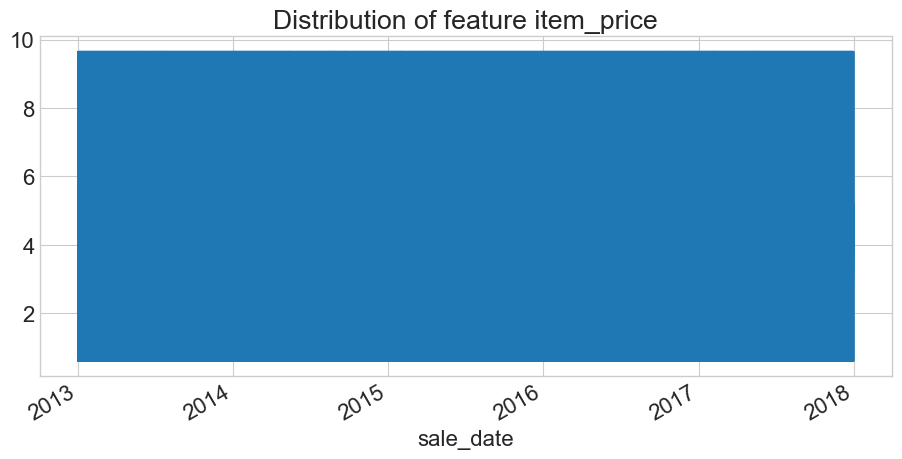

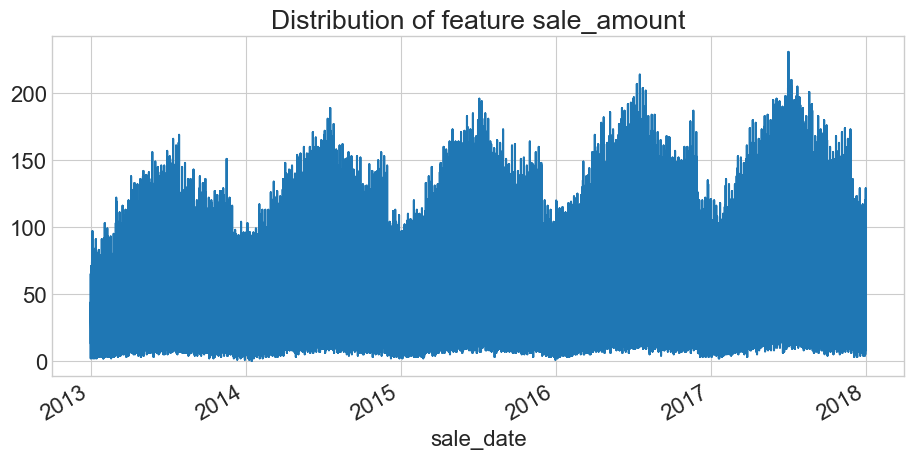

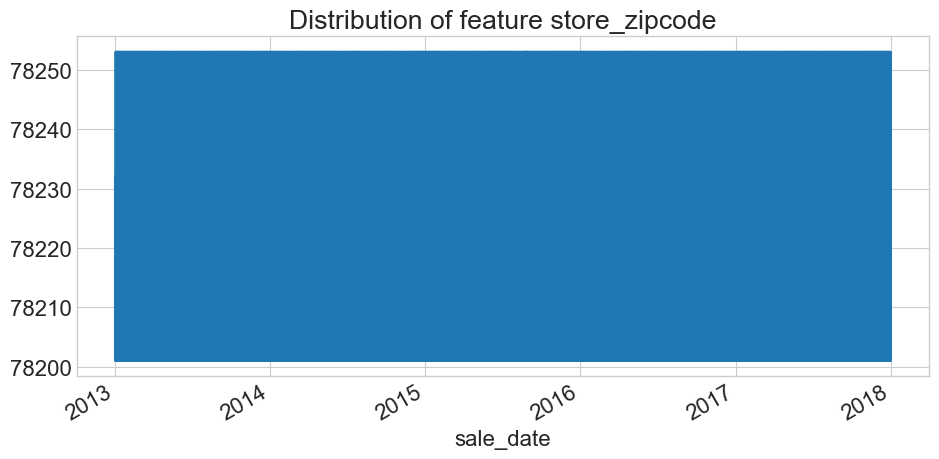

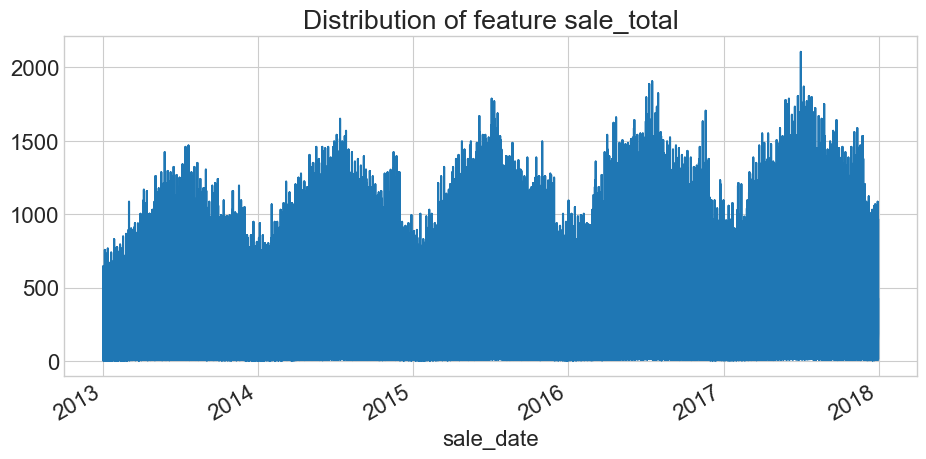

In [24]:
# the only things I really want to plot here are
# item_price, sale_amount, store_zipcode, sale_total
cols = ['item_price', 'sale_amount', 'store_zipcode', 'sale_total']
for col in cols:
    df[col].plot()
    plt.title(f'Distribution of feature {col}')
    plt.show()

#### Univariate Takeaways

It appears that prices and stores were constant over this period.The average sale seemed to trend upward year on year but also shows significant annual seasonality. The quantities sold also trended up with the same annual seasonality.

#### Bivariate Analysis

##### Questions:
1. Did prices remain constant over time?
1. Did sales by store differ?
1. Did sales by store change over time?
1. What was the highest grossing store?
1. What was the lowest grossing store?

#### Did prices remain constant over time?

In [25]:
import statistics as stats
unique_prices = []

for i in range(1, 50):
    unique_prices.append(train[(train.item_id == i)].item_price.nunique())
    
stats.mean(unique_prices)
    

1

A: The calculation confirms the chart -- every item has 1 unique price over time

#### Did sales by store differ?

In [26]:
train.columns

Index(['item_id', 'item_upc14', 'item_upc12', 'item_brand', 'item_name',
       'item_price', 'sale_id', 'sale_amount', 'store_address',
       'store_zipcode', 'store_city', 'store_state', 'sale_total'],
      dtype='object')

<AxesSubplot:xlabel='store_zipcode'>

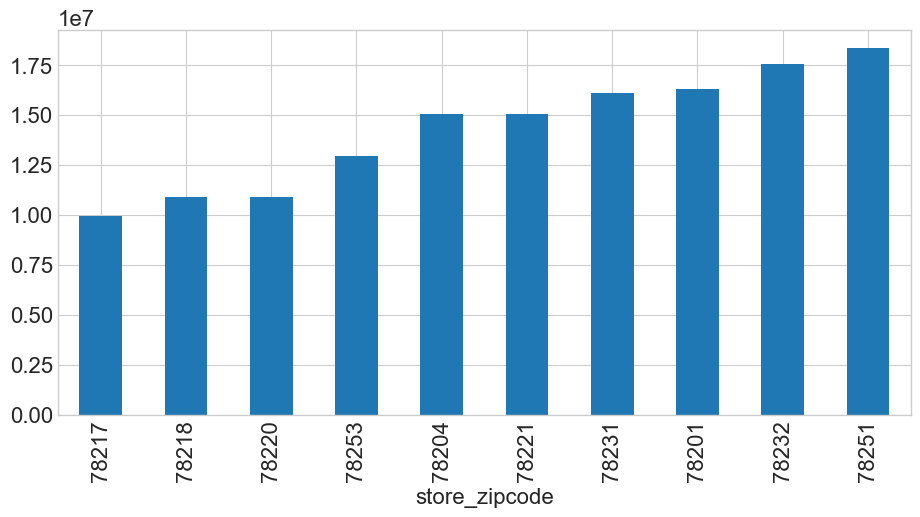

In [27]:
train.groupby('store_zipcode').sale_total.sum().sort_values().plot.bar()

#### Did sales by store change over time?


In [33]:
df.resample('D').sale_total.sum()

sale_date
2013-01-01     73844.01
2013-01-02     73570.58
2013-01-03     78169.48
2013-01-04     84467.73
2013-01-05     87621.85
                ...    
2017-12-27    109151.15
2017-12-28    117377.49
2017-12-29    126541.84
2017-12-30    134903.07
2017-12-31    140905.74
Freq: D, Name: sale_total, Length: 1826, dtype: float64

#### What was the highest grossing store?


#### What was the lowest grossing store?

### **Energy EDA**

##### *Choose a method of splitting your data and only explore the training split.*

